# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('EasyVisa.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
#look at the shape of the dataset
df.shape

(25480, 12)

In [4]:
#get info about the data types in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are no missing values present in the dataset

In [5]:
#the dataset memory usage is quite high.  I will convert all the object data to categorical type. 
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
for i in cols:
    df[i] = df[i].astype('category')

In [147]:
#checking to make sure all the objects have been converted to category type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


converting of the objects to categorical datatypes reduces the space required for storage of the dataframe.

In [148]:
#view statistics about the numerical data
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


## Data Overview

- Observations
- Sanity checks

-   There are no null values in the dataset
-   Object datatypes have been converted to category
-   The dataset contains 9 categorical data types, 2 integer data types and 1 float data type
-   the case_id column is a unique identifier such as a primary key used in the database.  it will not have an   
    influence  on predictive modeling. 
- <h3>The minimum no of employees are -26 which I suspect is a fault </h3>


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.




**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [25]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [135]:
df.duplicated().sum()

0

In [136]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

there are no rows with duplicated values in the dataset

## 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

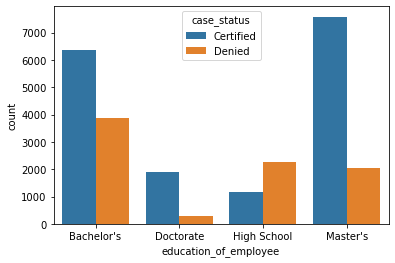

In [26]:
#use of a countpplot to determine education level and visa certification
sns.countplot(data=df, x='education_of_employee', hue='case_status')


Looking at the countplot when a person only has a highschool education  the majority of the visas are denied.  But when a person has more than a high school education bachelors etc the chance is more likely that it will be certified.

## 2. How does the visa status vary across different continents? 

In [29]:
#use a groupby clause to group visa status according to continent

df.groupby(['continent', 'case_status']).size()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

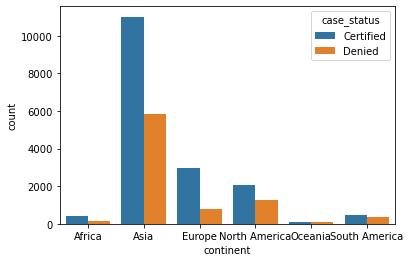

In [40]:
#creating a countplot to view visa status by continent
sns.countplot(data=df, x='continent', hue='case_status')

-   The majority of people from Aisa are certified for a visa. 
-   In European countries more than 2/3s of people applying are certified.
-   Interestingly for oceania countries it looks like a 50/50 chance of being certified or denied a visa.  I suspect -  
    this has to do with the Immigration policies of those countries where people have to get permission from the government to get a visa approved.
-   The ratio for certified or denied for Africa, North America and South America is very similar.

## 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

In [43]:
#group the data by work experience and case status of Certified or Denied
df.groupby(['has_job_experience', 'case_status']).size()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
dtype: int64

<AxesSubplot:xlabel='has_job_experience', ylabel='count'>

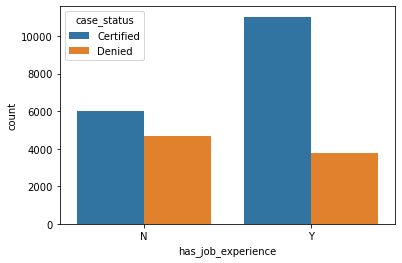

In [45]:
#create a plot to visualize job experience and visa status
sns.countplot(data=df, x='has_job_experience', hue='case_status')

In [52]:
df_certified = df.query('case_status == "Certified" & has_job_experience == "Y"')
df_certified_no_work = df.query('case_status == "Certified" & has_job_experience == "N"')
#df_not_certified = df.query('case_status == "Denied"')

print('The percentage of cases certified and has work experience ' + str(len(df_certified) / len(df) * 100))
print('The percentage of cases certified and has no work experience ' + str(len(df_certified_no_work) / len(df)* 100))

The percentage of cases certified and has work experience 43.26530612244898
The percentage of cases certified and has no work experience 23.524332810047095


Work experience has major influence on whether a visa is certified or not
-   Out of the entire dataset 43% of people that were certified and had job experience
-   23% of people that were certified did not have job experience.
-   The chance of being certified increases by almost 50% if a person has work experience

## 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

In [53]:
#sanity check
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [57]:
#create a query with only data about North America
north_america = df.query('continent == "North America"')
#make sure the query executed properly
north_america.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
21,EZYV22,North America,Master's,Y,N,1706,2013,Midwest,137694.9800,Year,N,Certified
23,EZYV24,North America,High School,N,N,1517,1884,Midwest,90108.3800,Year,N,Certified
25,EZYV26,North America,Master's,N,N,1100,1997,Midwest,99489.6500,Year,Y,Certified
43,EZYV44,North America,Master's,Y,N,2582,1989,South,54614.4200,Year,Y,Certified


<AxesSubplot:xlabel='unit_of_wage', ylabel='Count'>

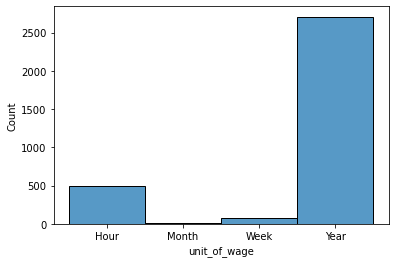

In [63]:
sns.histplot(data=north_america, x='unit_of_wage')

In [66]:
north_america.groupby(['case_status', 'unit_of_wage']).size()

case_status  unit_of_wage
Certified    Hour             162
             Month             10
             Week              43
             Year            1822
Denied       Hour             333
             Month              7
             Week              32
             Year             883
dtype: int64

<AxesSubplot:xlabel='unit_of_wage', ylabel='count'>

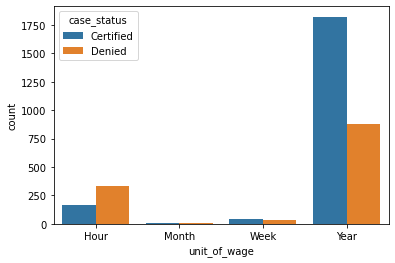

In [64]:
sns.countplot(data=north_america, x='unit_of_wage', hue='case_status')

-   There are 4 different units of wage used in North America
-   The Majority of unit of wage used is Year
-   The unit of wage most likely to be certified for visa is Year


## 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<AxesSubplot:xlabel='case_status', ylabel='prevailing_wage'>

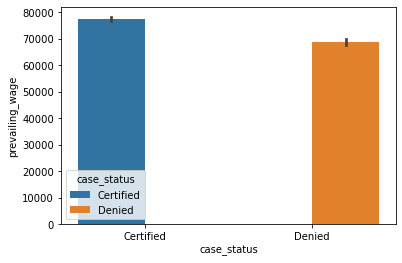

In [90]:
#sanity check of info in dataset

df.head()
sns.barplot(data=df, x='case_status', y='prevailing_wage', hue='case_status')

The prevailing wage for certified and denied status are mostly similar to each other

##  Univariate Analysis of data

In [97]:
#create a function to plot a boxplot and a histogram along the same scal

def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
    #Boxplot and histogram combined
    #data= dataframe
    #feature: datafram column
    #figsize:  size of figure (default(12,7))
    #kde: whether to show the density curve(default False)
    #bins: number of bins for histogram(default None)

    f2, (ax_box2, ax_hist2) = plot.subplots(
        nrows=2, #number of rows of the subplot grid = 2
        sharex=True, #x-axis will be shared among all subplots
        gridspec_kw = {'height_ratios' : (0.25, 0.75)},
        figsize = figsize,

    ) 
    
    #creating the 2 subplots 
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram



In [95]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


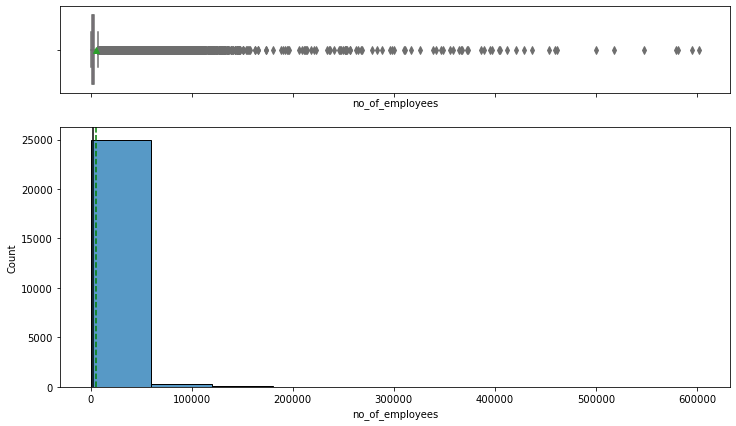

In [113]:
histogram_boxplot(df, 'no_of_employees', bins= 10
)

The number of employees is mostly uniform when applying bins to the plot.  there is a short tail to the right. indicating minimal skewness

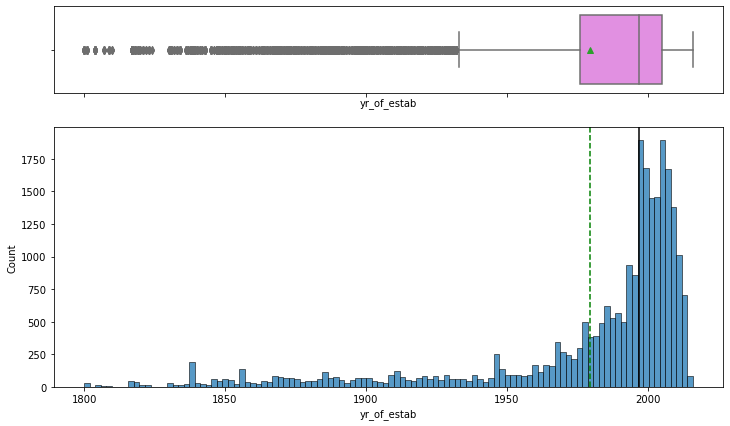

In [99]:
histogram_boxplot(df, 'yr_of_estab')

year of establishment is high skewed to the left.  there is a similar trend from 1850- 1950 and then in 1950 we see an increase in companies established.  Then in the new milenium the number increased tremendously

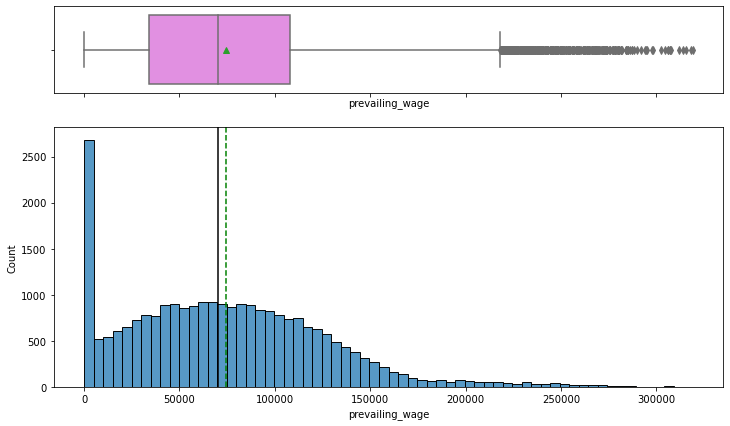

In [100]:
histogram_boxplot(df, 'prevailing_wage')

the prevailing wage looks almost like a normal distribution with one large bar at the front.  several outliers are present in the prevailing wage feature

## Bivariate Analysis

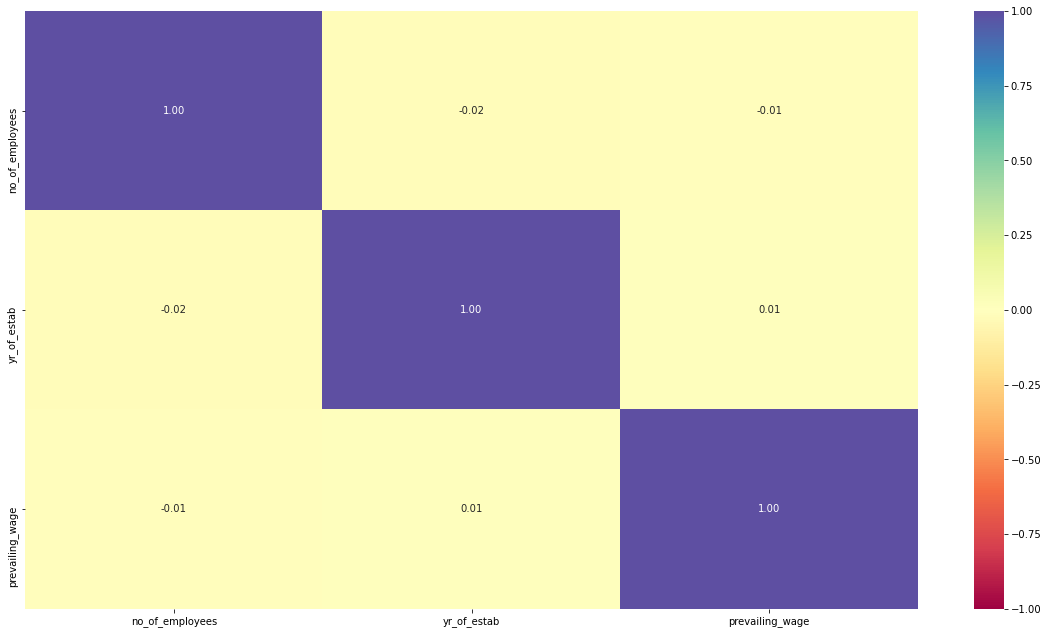

In [115]:
plot.figure(figsize=(20,11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plot.show()

none of the numerical variables are correlated with each other.

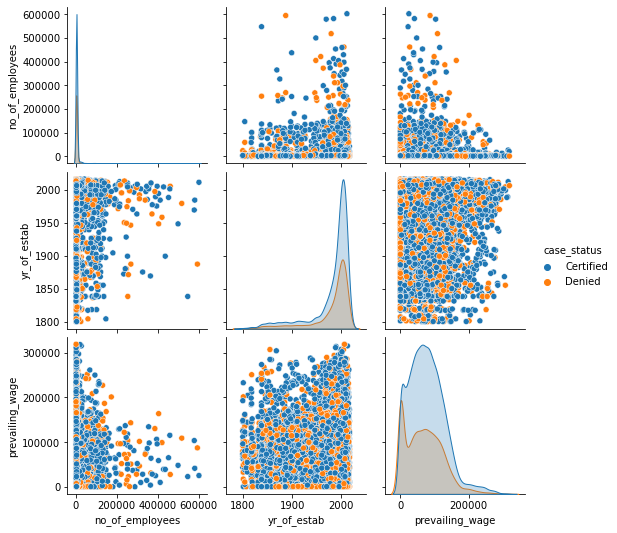

In [116]:
sns.pairplot(data=df, hue='case_status')

-   the number of employees and certified seems to indicate that the higher the number of employees a company has the   
     better chance of being certified.
-   also more employees are certified for companies established after the 1950s
-   where prevailing wage is high the chance of being certified also seems better


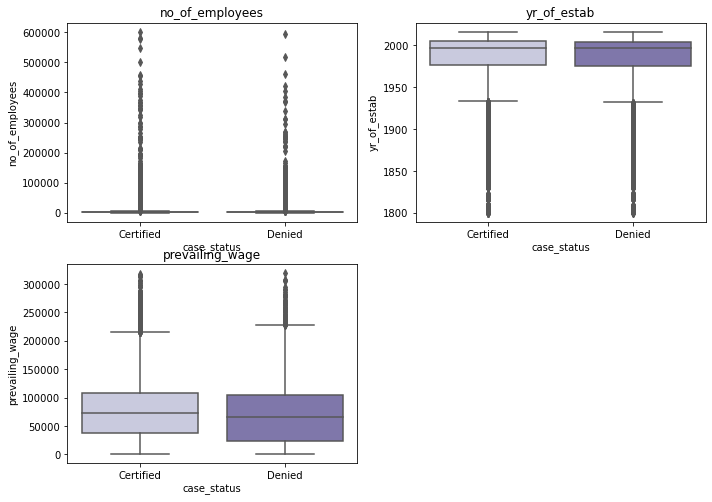

In [120]:
cols = df[['no_of_employees', 'yr_of_estab', 'prevailing_wage']]
plot.figure(figsize=(10,10))

for i, variable in enumerate(cols):
    plot.subplot(3,2,i+1)
    sns.boxplot(df['case_status'], df[variable], palette='Purples')
    plot.tight_layout()
    plot.title(variable)

-   the number of employees of a firm and the chance of being granted certified or denied seems almost the same.  this indicates it doesnt really matter if an employee is hired by a company with many employees or a few.

-   where the prevailing wage is more the chance of being certified is also higher.

-   the year a company is established does not seem to have any influence on whether a person's visa is certified or denied

In [138]:
#sanity check of data in dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [140]:
#make a copy of the dataset for editing 
dfcopy = df.copy()

In [145]:
#drop the case_id column from the dataset as it does not provide any value.
dfcopy.drop(['case_id'], inplace=True, axis=1)

KeyError: "['case_id'] not found in axis"

In [146]:
dfcopy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## Missing value treatment

There are no missing values in the dataset

## Feature Engineering



### replace the structure of the following columns

-   education of employee 
    - 1 - Highschool
    - 2 - Bachelors
    - 3 - Master's
    - 4 - Doctorate

In [154]:
#change the values to numerical for education_of_employee column

replace_cat = {
    'education_of_employee': {'High School': 1, "Bachelor's": 2, "Master's": 3, "Doctorate" : 4}
}

#replace the object type with the newly assigned integers

dfcopy=dfcopy.replace(replace_cat)

In [157]:
#make sure that column was changed
dfcopy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,1,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,3,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,2,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,2,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,3,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [158]:
#change the values of the case_status column
#visa denied will be 0
#visa certified will be 1
replace_stat = {
    'case_status': {'Denied' : 0, 'Certified': 1}
}

dfcopy = dfcopy.replace(replace_stat)

In [159]:
dfcopy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,1,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,3,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,2,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,2,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,3,Y,N,1082,2005,South,149907.3900,Year,Y,1


### create dummy variables for the following columns
- continent
-   has_job_experience
-   requires_job_training
-   region_of_employment
-   unit_of_wage
-   full_time_position



In [165]:
#create dummy variables

dummy_columns = ['continent', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']

dfcopy = pd.get_dummies(dfcopy, columns = dummy_columns)

In [167]:
#make sure that columns have been changed to dummy variables
dfcopy.head()

,education_of_employee,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,...,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y
0,1,14513,2007,592.2029,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,3,2412,2002,83425.6500,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,2,44444,2008,122996.8600,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,98,1897,83434.0300,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,3,1082,2005,149907.3900,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [169]:
#check data type and ensure no object data in the dataset
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   no_of_employees                 25480 non-null  int64  
 2   yr_of_estab                     25480 non-null  int64  
 3   prevailing_wage                 25480 non-null  float64
 4   case_status                     25480 non-null  int64  
 5   continent_Africa                25480 non-null  uint8  
 6   continent_Asia                  25480 non-null  uint8  
 7   continent_Europe                25480 non-null  uint8  
 8   continent_North America         25480 non-null  uint8  
 9   continent_Oceania               25480 non-null  uint8  
 10  continent_South America         25480 non-null  uint8  
 11  has_job_experience_N            25480 non-null  uint8  
 12  has_job_experience_Y            

## Outlier detection in the model

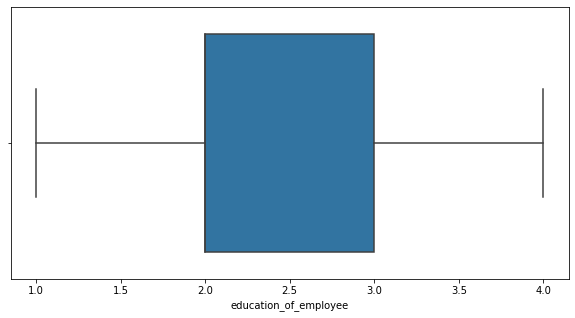

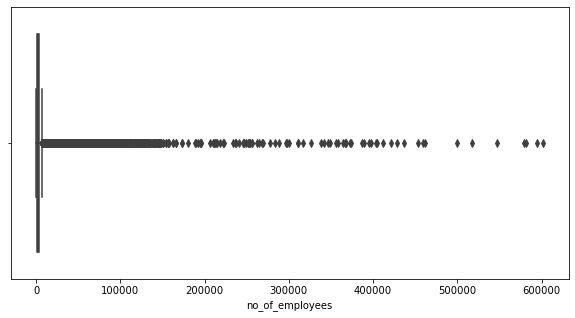

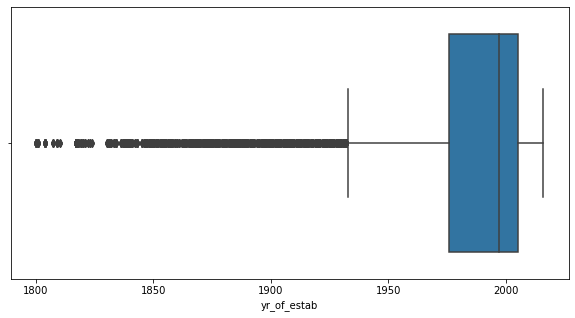

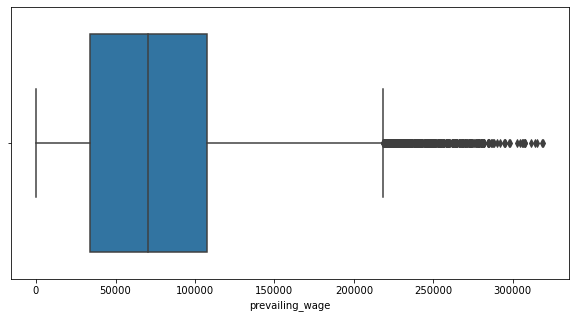

In [173]:
#check outliers in the dataset

boxplot_columns =dfcopy[['education_of_employee', 'no_of_employees', 'yr_of_estab', 'prevailing_wage']]

for column in boxplot_columns:
    plot.figure(figsize=(10,5))
    sns.boxplot(data=boxplot_columns, x=column)

Outliers are present in the dataset<br>
It is not required to be treated as the outliers are real values

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Summary of EDA

## Data Description
-   There are 25480 rows and 12 columns in the dataset
-   There are no missing values present in the dataset
-   the case_id column is dropped as is does not provide any insight for predictive modelling



## Observations from EDA

-   If you have a tertiary education you are more likely to have your visa certified
-   People from ASIA have the highest rate of certified Visas compared to any of the other continents
-   If you have job experience the chance of being certified for a VISA is very high, almost double compared to no work experience
-   In North America the dominant unit_of_wage used is per year
-   The prevailing wage in a country does not seem to have an influence on visa status
-   All the object data types where applicable have been converted to category
-   The minimum number of employees in the dataset is -26 and the max number of employe3es are 602069
-   The oldest company in the dataset was established in 1800
-   The most recent company established in the dataset was in 2016
-   75% of the companies were established in 2005
-   There are no duplicate rows in the data

## Model Building Approach

In [175]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   no_of_employees                 25480 non-null  int64  
 2   yr_of_estab                     25480 non-null  int64  
 3   prevailing_wage                 25480 non-null  float64
 4   case_status                     25480 non-null  int64  
 5   continent_Africa                25480 non-null  uint8  
 6   continent_Asia                  25480 non-null  uint8  
 7   continent_Europe                25480 non-null  uint8  
 8   continent_North America         25480 non-null  uint8  
 9   continent_Oceania               25480 non-null  uint8  
 10  continent_South America         25480 non-null  uint8  
 11  has_job_experience_N            25480 non-null  uint8  
 12  has_job_experience_Y            

In [176]:
X = dfcopy.drop(['case_status'], axis = 1)
y = dfcopy['case_status']

In [177]:
#split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 25) (7644, 25)


In [178]:
y.value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

In [179]:
y_test.value_counts()

1    5105
0    2539
Name: case_status, dtype: int64

#  Model Evaluation Criteria

## Model can make wrong predications as such:

1.  Predicting a visa will be certified and it is not certified
2.  Prediciting a visa is not certified and it is certified

### Which case is more important in the model

Predicting that a person's visa will be certified and its not certified. <br>
This can cause expenses for the company as well as the client 

### Define a function to provide metric scores(accuracy, recall and precision) 

In [180]:
def model_performance_classification_sklearn(model, predictors, target):
    #a function to compute the different metrics to check model performance
    #model:  the classifier that will be used
    #predictors:  independent variables
    #target: dependent variable

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred) #used to compute accuracy
    recall = recall_score(target, pred) #used to compute recall
    precision = precision_score(target,pred) #used to compute precision score
    f1 = f1_score(target, pred) #used to compute f1 score

    #create a dataframe for the performance metrics / score

    df_perf = pd.DataFrame(
        {
            'Accuracy' : acc,
            'Recall' : recall,
            'Precision' : precision,
            'F1' : f1,
        },
            index=[0]
    )

    return df_perf

Define a function for the confussion matrix model



In [186]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plot.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plot.ylabel("True label")
    plot.xlabel("Predicted label")

## Building a Decision Tree Model

In [183]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [184]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

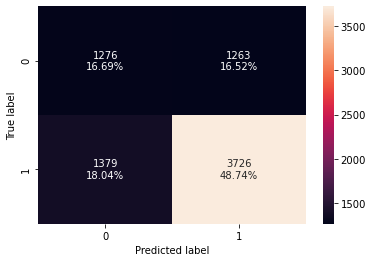

In [187]:
confusion_matrix_sklearn(dtree, X_test, y_test)

### Confusion Matrix

-   The model predicted a visa will be certified and visa was certified 48.74% of the time
-   The model predicted a visa will be denied and it was denied 16.69% of the time
-   The model predicted visa will be certified and was not certified 16.52% of the time
-   Model predicted not certified and was certified 18.04% of the time

In [188]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [189]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.654369  0.729873   0.746843  0.73826


Our decision tree model is working very well on the training data.  
-   on the testing data however the accuracy dropped quite a bit.
-   precision and recall is very close to each other on the testing data.

## Building bagging and boosting models

### Bagging Classifier

In [190]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)


BaggingClassifier(random_state=1)

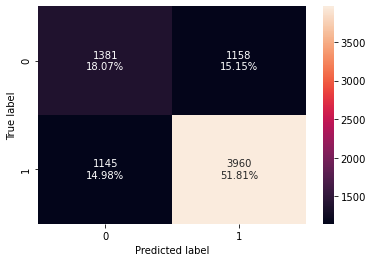

In [191]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [192]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.982956  0.983547   0.990867  0.987194


In [193]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.698718  0.77571    0.77374  0.774724


-   The bagging model  has increased accuracy on the testing date
-   Recall & Precision also increased on the test data with the bagging model

### Bagging Classifier with weighted decision tree

In [194]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

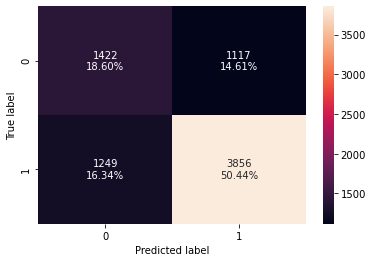

In [195]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [196]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984582  0.984387   0.992468  0.988411


In [197]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.690476  0.755338   0.775387  0.765231


The weighted bagging classifier does not seem to add any benefit to the model.  The accuracy, recall & precision are mostly similar for the model

## Random Forest Model

In [198]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

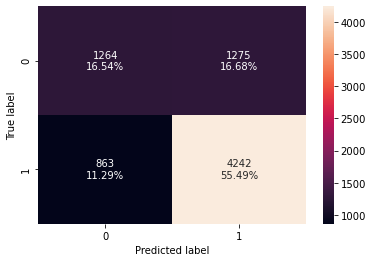

In [199]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [201]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [202]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision       F1
0  0.720304  0.83095   0.768896  0.79872


There is a remarkable increase in the performance of the Random Forest model. Each score in the testing data has increased quite a bit with a Randfom Forest model

## Random Forst with class Weights

In [203]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

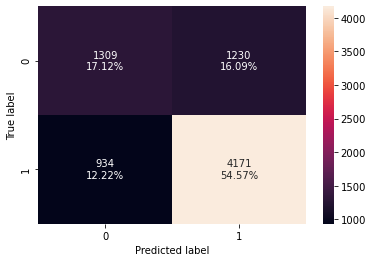

In [204]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [205]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


In [206]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.716902  0.817042   0.772264  0.794022


By adding weights the different scores actually decreased on the model

## Boosting Models

## AdaBoost Classification Model

In [208]:
#importing librariers for boosting models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [209]:
#building the model

abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [213]:
abc_model_train = model_performance_classification_sklearn(abc, X_train,y_train)
print('Training performance\n', abc_model_train)

Training performance
    Accuracy    Recall  Precision        F1
0  0.737329  0.888777   0.759105  0.818839


In [214]:
abc_model_test = model_performance_classification_sklearn(abc, X_test,y_test)
print('Testing performance\n', abc_model_test)

Testing performance
    Accuracy    Recall  Precision        F1
0  0.733386  0.885602   0.756653  0.816065


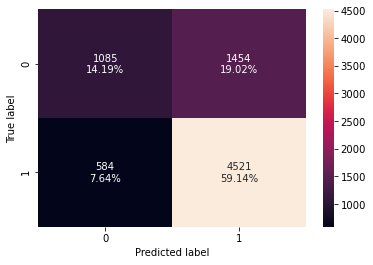

In [217]:
confusion_matrix_sklearn(abc,X_test, y_test)

-   Model performance has improved  more with ADAboost.  
-   Accuracy of our model is now at 73% 
-   The training and testing data also are almost the same indicating that there is no overfitting of the data currently

## Gradient Boosting Classifier

In [218]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [219]:
gbc_model_train = model_performance_classification_sklearn(gbc, X_train,y_train)
print('Training performance\n', gbc_model_train)

Training performance
    Accuracy    Recall  Precision        F1
0  0.757961  0.882733   0.782673  0.829697


In [220]:
gbc_model_test = model_performance_classification_sklearn(gbc, X_test,y_test)
print('Testing performance\n', gbc_model_test)

Testing performance
    Accuracy    Recall  Precision        F1
0  0.745552  0.876004   0.773167  0.821379


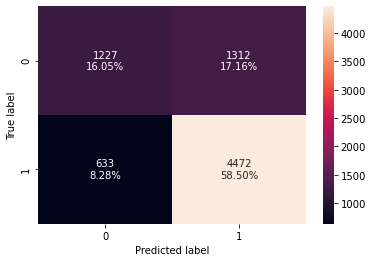

In [221]:
confusion_matrix_sklearn(gbc,X_test, y_test)

Scores on the GBC model training and testing data are very similar.  No overfitting of the data in the model

In [222]:
## XGBoost model 

!pip install xgboost
from xgboost import XGBClassifier

In [223]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [224]:
xgb_model_train = model_performance_classification_sklearn(xgb, X_train,y_train)
print('Training performance\n', xgb_model_train)

Training performance
    Accuracy    Recall  Precision        F1
0   0.83752  0.932846   0.841193  0.884652


In [225]:
xgb_model_test = model_performance_classification_sklearn(xgb, X_test,y_test)
print('Testing performance\n', xgb_model_test)

Testing performance
    Accuracy    Recall  Precision       F1
0  0.732862  0.859941   0.767885  0.81131


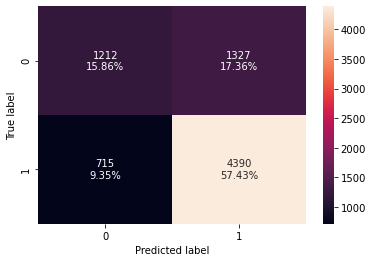

In [226]:
confusion_matrix_sklearn(xgb, X_test, y_test)

The model performance of the XGBoost model is slightly worse than the GradientBoosting model.

-   Out of all the models using the default parameters the GradientBoosting model is getting the best results on accuracy, recall and precision


##  Will tuning the hyperparameters improve the model performance?

## Tuning Decision Tree model

In [235]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

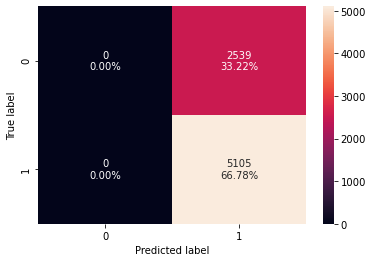

In [236]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [237]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


In [238]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


Recall in the tuned model has increased, but accuracy and precision decreased a lot

In [241]:
## AdaBoost Tuning

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [245]:
abc_tuned_score_train = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
print("Training Performance \n",abc_tuned_score_train)

Training Performance 
    Accuracy    Recall  Precision        F1
0  0.691803  0.971628   0.691706  0.808113


In [242]:
abc_tuned_score = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Testing performance \n",abc_tuned_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.689953  0.971988   0.690221  0.807223


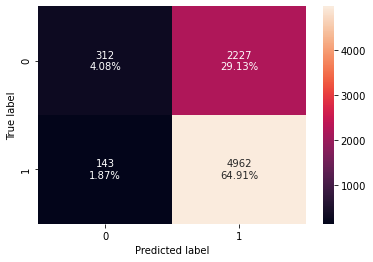

In [248]:
confusion_matrix_sklearn(abc_tuned,X_test, y_test)

-   This model is showing decreased score compared to the previous models
-   Recal has increased compared to the default model

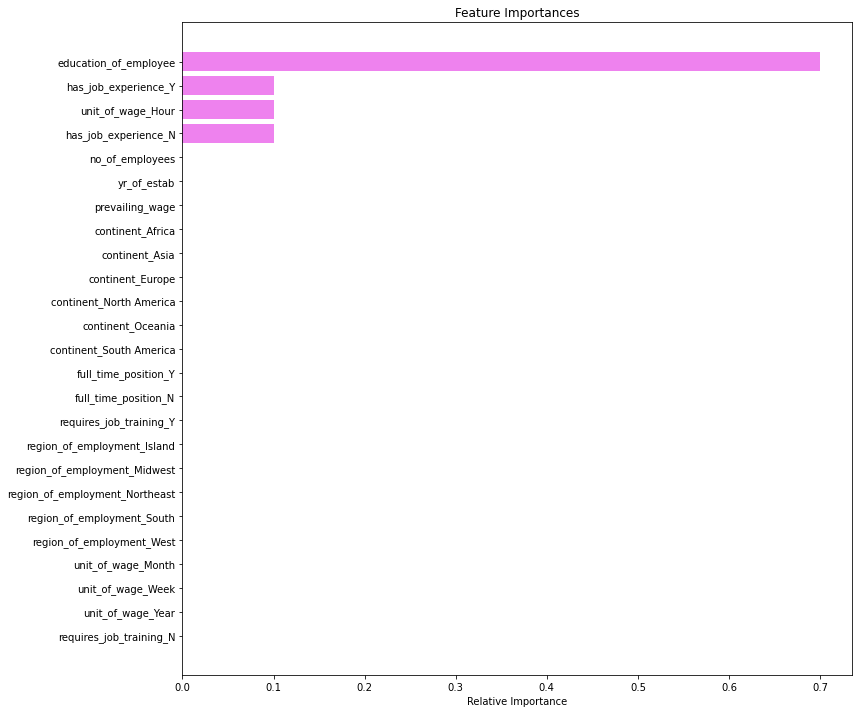

In [250]:
#viewing feature importances in the model.

importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plot.figure(figsize=(12,12))
plot.title('Feature Importances')
plot.barh(range(len(indices)), importances[indices], color='violet', align='center')
plot.yticks(range(len(indices)), [feature_names[i] for i in indices])
plot.xlabel('Relative Importance')
plot.show()

The most important feature  considered by the model is the education of the individual

### Tuned Gradient Boost Model

In [251]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [252]:
gbc_tuned_score_train = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training Performance \n",gbc_tuned_score_train)

Training Performance 
    Accuracy    Recall  Precision        F1
0  0.728527  0.934945   0.732522  0.821447


In [253]:
gbc_tuned_score_test = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Training Performance \n",gbc_tuned_score_test)

Training Performance 
    Accuracy    Recall  Precision        F1
0  0.719257  0.931244   0.725912  0.815857


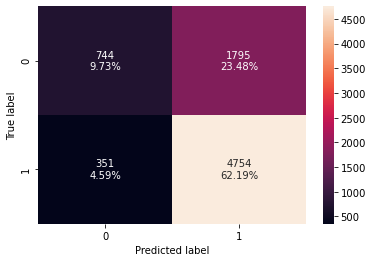

In [255]:
confusion_matrix_sklearn(gbc_tuned,X_test, y_test)

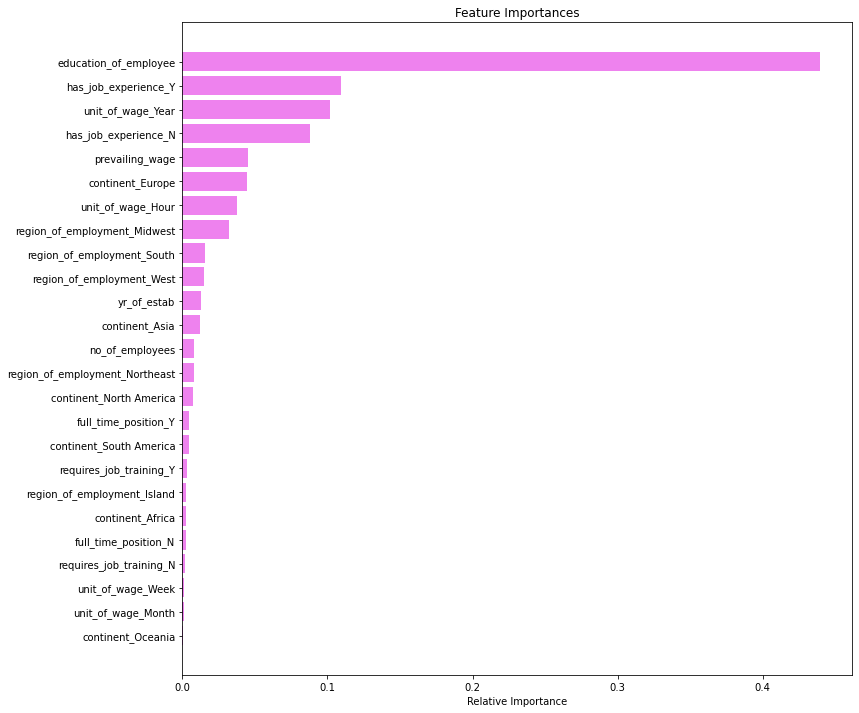

In [254]:
#view the most important features in the Gradient Boosting model.

importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plot.figure(figsize=(12,12))
plot.title('Feature Importances')
plot.barh(range(len(indices)), importances[indices], color='violet', align='center')
plot.yticks(range(len(indices)), [feature_names[i] for i in indices])
plot.xlabel('Relative Importance')
plot.show()

## Model Performance Comparison and Conclusions

In [256]:
#creating a dataframe to compare different model test results

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T, abc_model_test.T, gbc_model_test.T, dtree_estimator_model_test_perf.T, abc_tuned_score.T, gbc_tuned_score_test.T ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    'Ada Boost Classifier',
    'Gradient Boosting Classifier',
    'Decision Tree Estimator',
    'AdaBoost Tuned model SCore',
    'Gradient Boost Classifier'
]
print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Ada Boost Classifier,Gradient Boosting Classifier,Decision Tree Estimator,AdaBoost Tuned model SCore,Gradient Boost Classifier
Accuracy,0.654369,0.698718,0.690476,0.720304,0.716902,0.733386,0.745552,0.667844,0.689953,0.719257
Recall,0.729873,0.775710,0.755338,0.830950,0.817042,0.885602,0.876004,1.000000,0.971988,0.931244
Precision,0.746843,0.773740,0.775387,0.768896,0.772264,0.756653,0.773167,0.667844,0.690221,0.725912
F1,0.738260,0.774724,0.765231,0.798720,0.794022,0.816065,0.821379,0.800847,0.807223,0.815857


Out of all the different models the Gradient boosting classifier model is getting the best scores

## Actionable Insights and Recommendations

-   We have build a model that  the company can use to identify people that will be certified
-   The factors with the most importance for a visa to be certified is:  
    -   education of employee
    -   job experience
-   The following factors does not seem to have much influence on wehter a VISA is certified or not.
    -   requires job training
    -   full time position
    -   unit of wage
    -   year that the company is established
-   If the company wants to get more applications certified it will be best to focus on case loads where a minimum qualification is Bachelors Degree